<a href="https://colab.research.google.com/github/Jungin1020/Aiffel_exp/blob/main/2022_01_25_ewp_7_shallow_focus_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##모델 & 라이브러리 다운로드

------------------------

##Segmentation이란
##이미지에서 픽셀 단위로 관심 객체를 추출하는 방법

------------------------


###semantic segmentation
###물리적 단위로 분류해서 인식

###instance segmentation
###사람 개개인 별로 분할해서 인식

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip3 install pixellib
!pip3 install tensorflow--gpu pixellib -- upgrade

import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

In [3]:
model_dir = '/content/drive/MyDrive/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir,'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

urllib.request.urlretrieve(model_url, model_file)

('/content/drive/MyDrive/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f78a02aaf90>)

###model = semantic_segmentation()

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

#배경 전환 크로마키 - 자동차

(413, 620, 3)


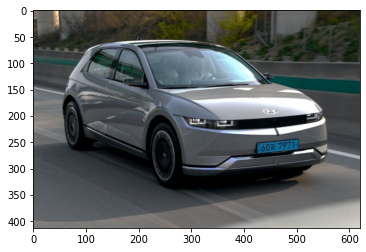

In [5]:
img_dir = '/content/drive/MyDrive/aiffel/human_segmentation/images/'
img_path = os.path.join(img_dir,'image_car.png')
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()


##모델에 이미지 입력

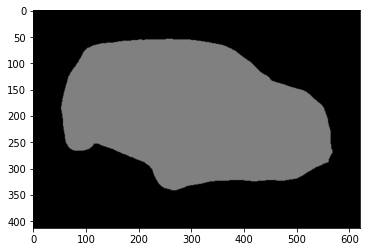

In [6]:
segvalues, output = model.segmentAsPascalvoc(img_path)
plt.imshow(output)
plt.show()

In [7]:
LABEL_NAMES = [
               'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus','car', 'cat', 'chair',
               'cow', 'diningtable', 'dog', 'horse', 'motorbike','person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

##어떤 물체가 담겨있는지 확인

In [8]:
print(segvalues)
for class_id in segvalues['class_ids']:
  print(LABEL_NAMES[class_id])

{'class_ids': array([0, 7]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])}
background
car


In [9]:
colormap = np.zeros((256,3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
  for channel in range(3):
    colormap[:,channel] |=((ind >> channel) & 1) << shift
  ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

##colormap 대칭해서 seg_map

In [10]:
colormap[7]

array([128, 128, 128])

(413, 620)


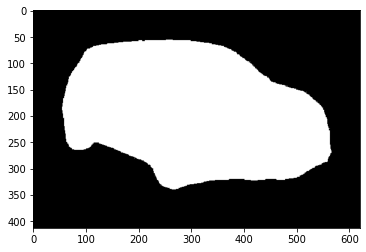

In [11]:
seg_color = colormap[7]
seg_map = np.all(output==seg_color, axis=-1) #output의 픽셀이 seg_color 와 같다면 true 아니먄 false
print(seg_map.shape)
plt.imshow(seg_map,cmap='gray')
plt.show()

##원래 이미지와 겹쳐 보기

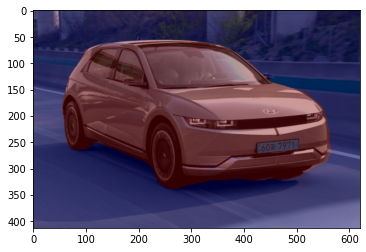

In [12]:
img_show = img_orig.copy()

img_mask = seg_map.astype(np.uint8) * 255 #true, false 값을 각각 255, 0으로 바꿔줌
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

##마스크 이용하기

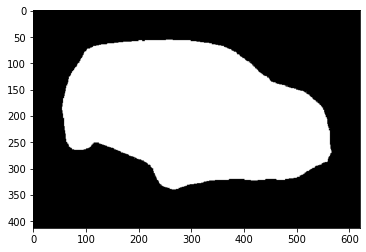

In [13]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR) #흑백을 bgr로 바꿔줌
plt.imshow(img_mask_color)
plt.show()

(413, 620, 3)


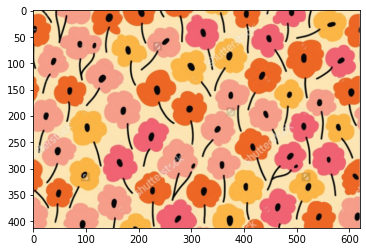

In [14]:
img_path_flower = os.path.join(img_dir,'flower_pattern.png')
img_orig_flower = cv2.imread(img_path_flower)
img_flower = img_orig_flower.copy()



print(img_flower.shape)
plt.imshow(cv2.cvtColor(img_flower, cv2.COLOR_BGR2RGB))
plt.show()

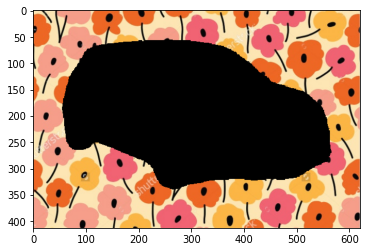

In [15]:
img_bg_mask = cv2.bitwise_not(img_mask_color) #이미지 컬러 반전
img_bg_mul = cv2.bitwise_and(img_flower, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_mul, cv2.COLOR_BGR2RGB))
plt.show()

###마스크가 255인 부분만 img_orig, 나머지는 img_flower

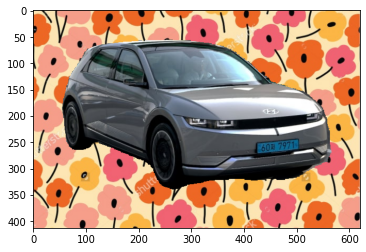

In [16]:
img_concat = np.where(img_mask_color == 255, img_orig, img_flower)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

#배경 블러 - 강아지

(720, 720, 3)


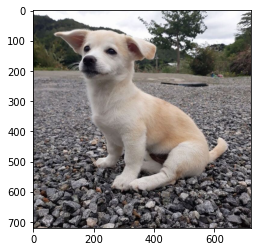

In [17]:
img_path = '/content/drive/MyDrive/aiffel/human_segmentation/images/julmi.png'
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))

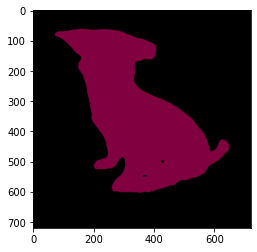

In [18]:
segvalues, output = model.segmentAsPascalvoc(img_path)
plt.imshow(output)
plt.show()

In [19]:
for class_id in segvalues['class_ids']:
  print(LABEL_NAMES[class_id])

background
dog


In [20]:
colormap = np.zeros((256,3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
  for channel in range(3):
    colormap[:,channel] |=((ind >> channel) & 1) << shift
  ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [21]:
colormap[12]

array([ 64,   0, 128])

In [22]:
seg_color = (128,0,64)

(720, 720)


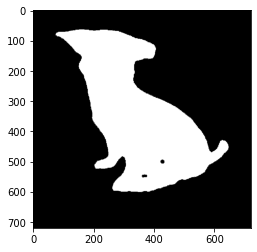

In [23]:
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map,cmap='gray')
plt.show()

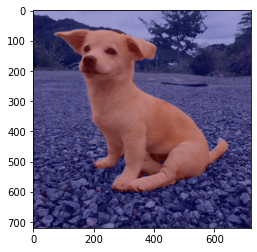

In [24]:
img_show = img_orig.copy()

img_mask = seg_map.astype(np.uint8) * 255 #true, false 값을 각각 255, 0으로 바꿔줌
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

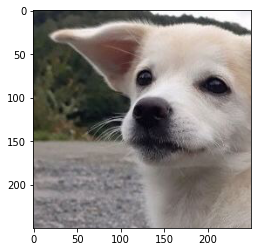

'\nimg_bg_crop = img_bg.crop((50,50,300,300)) #left,up,right,down <<넘파이배열엔 못 쓴다\nplt.imshow(cv2.cvtColor(img_bg_crop, cv2.COLOR_BGR2RGB))\nplt.show()\n\n'

In [25]:
img_bg = img_orig.copy()
img_bg = img_bg[50:300,50:300]
plt.imshow(cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB))
plt.show()


'''
img_bg_crop = img_bg.crop((50,50,300,300)) #left,up,right,down <<넘파이배열엔 못 쓴다
plt.imshow(cv2.cvtColor(img_bg_crop, cv2.COLOR_BGR2RGB))
plt.show()

'''

In [26]:
img_bg_resize = cv2.resize(img_bg,(720,720))

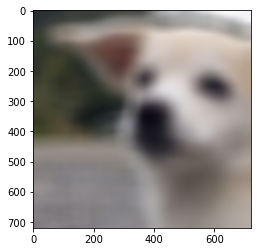

In [27]:
img_bg_blur = cv2.blur(img_bg_resize,(60,60))
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

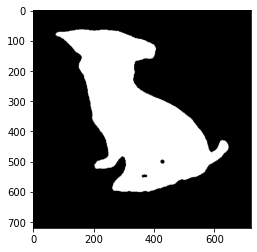

In [28]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR) #흑백을 bgr로 바꿔줌
plt.imshow(img_mask_color)
plt.show()

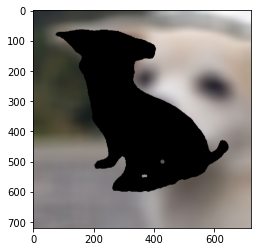

In [29]:
img_bg_mask = cv2.bitwise_not(img_mask_color) #이미지 컬러 반전
img_bg_blur = cv2.bitwise_and(img_bg_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

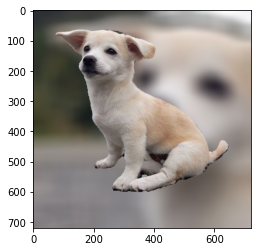

In [30]:
img_concat = np.where(img_mask_color == 255, img_orig, img_bg_blur) #마스크가 255인 부분만 img_orig, 나머지는 img_bg_blur
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(720, 720, 3)


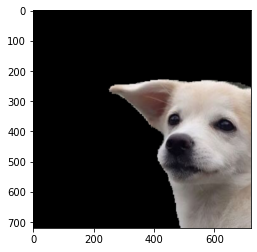

In [31]:
img_mask_sep = cv2.bitwise_and(img_orig, img_mask_color)
img_mask_sep = img_mask_sep[50:300,50:300]
img_mask_sep = cv2.resize(img_mask_sep,(520,520))
img_mask_sep = np.pad(img_mask_sep, ((200,0),(200,0),(0,0)),'constant', constant_values=0)
print(img_mask_sep.shape)
plt.imshow(cv2.cvtColor(img_mask_sep, cv2.COLOR_BGR2RGB))
plt.show()

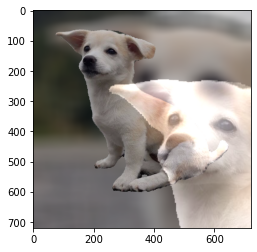

In [32]:
img_add = cv2.addWeighted(img_concat, 0.8, img_mask_sep, 0.6, 0.0)
plt.imshow(cv2.cvtColor(img_add, cv2.COLOR_BGR2RGB))
plt.show()

###아련....

#배경 블러 - 사람(feat. 사촌동생)

(800, 600, 3)


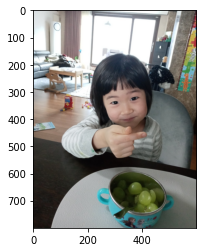

In [33]:
img_path = '/content/drive/MyDrive/aiffel/human_segmentation/images/image_baby.png'
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))

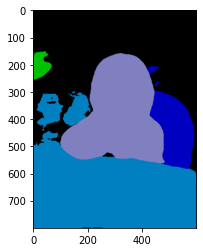

In [34]:
segvalues, output = model.segmentAsPascalvoc(img_path)
plt.imshow(output)
plt.show()

In [35]:
for class_id in segvalues['class_ids']:
  print(LABEL_NAMES[class_id])

background
chair
diningtable
person
sofa


###와우 여러개가 검출되었다!

In [36]:
colormap[15]

array([192, 128, 128])

(800, 600)


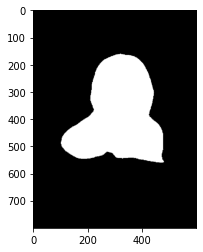

In [37]:
seg_color = (128,128,192)
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map,cmap='gray')
plt.show()

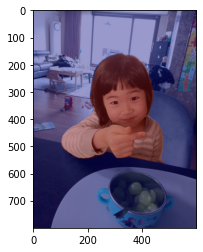

In [38]:
img_show = img_orig.copy()

img_mask = seg_map.astype(np.uint8) * 255 #true, false 값을 각각 255, 0으로 바꿔줌
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

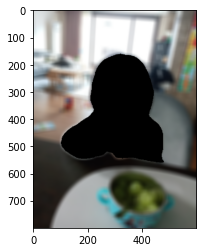

In [39]:
img_orig_blur = cv2.blur(img_orig,(20,20))
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()


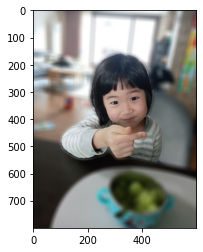

In [40]:
img_concat = np.where(img_mask_color == 255, img_orig, img_bg_blur) #마스크가 255인 부분만 img_orig, 나머지는 img_bg_blur
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

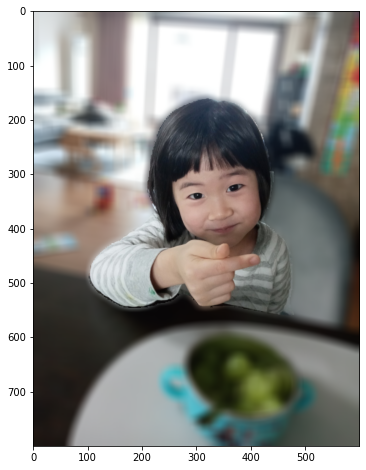

In [41]:
plt.figure(figsize=(6,8))
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

###전체적인 윤곽선은 잘 딴 것 같은데 가장자리 하얀 테두리가 신경쓰인다. 

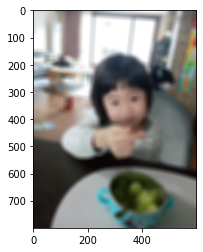

In [58]:
img_bg_blur_2 = cv2.blur(img_orig,(20,20))
plt.imshow(cv2.cvtColor(img_bg_blur_2, cv2.COLOR_BGR2RGB))
plt.show()

###전체적으로 blur를 준 뒤 사람 사진을 합쳐서 하얀 테두리가 생긴다고 판단

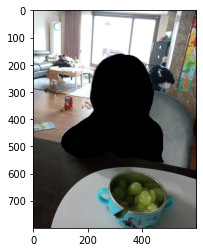

In [49]:
img_bg_2 = img_orig.copy()
img_bg_2 = cv2.bitwise_and(img_bg_2, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_2, cv2.COLOR_BGR2RGB))
plt.show()


###검은 부분을 제외하고 blur 값을 주고 싶었는데 실패했다.

In [57]:
img_bg_2[0]
b,g,r = cv2.split(img_bg_2)
img_bg_2[0]

array([[223, 222, 218],
       [223, 222, 218],
       [223, 222, 218],
       ...,
       [ 84,  82,  99],
       [ 84,  82,  99],
       [ 83,  81,  99]], dtype=uint8)

###지금 넘파이 배열은 alpha 값이 들어있지 않아서 alpha 열을 추가한 뒤 png로 저장해서 다시 불러온 다음 blur를 주고

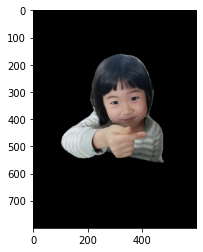

In [42]:
img_mask_sep = cv2.bitwise_and(img_orig, img_mask_color)
plt.imshow(cv2.cvtColor(img_mask_sep, cv2.COLOR_BGR2RGB))
plt.show()

###이 사진을 np.where로 합치면 될 것 같은데... 넘파이가 익숙하지 않아 실패했다...

In [44]:
# b,g,r = cv2.split(img_mask_sep)
# img_alpha = cv2.merge([b,g,r,img_mask_color], 4)

#cv2.imwrite('/content/drive/MyDrive/aiffel/human_segmentation/images/image_baby_tr.png', img_alpha)

In [45]:
'''
img_path_2 = '/content/drive/MyDrive/aiffel/human_segmentation/images/image_baby.png'
img_orig_2 = cv2.imread(img_path_2, cv2.IMREAD_UNCHANGED)

print(img_orig_2.shape)
plt.imshow(cv2.cvtColor(img_orig_2, cv2.COLOR_BGR2RGB))
'''

"\nimg_path_2 = '/content/drive/MyDrive/aiffel/human_segmentation/images/image_baby.png'\nimg_orig_2 = cv2.imread(img_path_2, cv2.IMREAD_UNCHANGED)\n\nprint(img_orig_2.shape)\nplt.imshow(cv2.cvtColor(img_orig_2, cv2.COLOR_BGR2RGB))\n"

In [47]:
#while True: pass

KeyboardInterrupt: ignored

#회고
1. 세그멘테이션이라는 훌륭한 모델을 알게 돼서 유익했다.
2. 마스크 사용할 떄 cv2.COLOR_GRAY2BGR
3. np.where(중요)